In [55]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import imageio

buf=[]
for i in range(20):
    s=""
    if i+1<10:
        s="0"+str(i+1)
    else:
        s=str(i+1)
    tmp=cv.imread("test/honeycombing/"+s+"00001.jpg")
    buf.append(tmp)
    
    
gif=imageio.mimsave('honeycombing.gif',buf,'GIF',duration=0.2)

buf=[]
for i in range(20):
    s=""
    if i+1<10:
        s="0"+str(i+1)
    else:
        s=str(i+1)
    tmp=cv.imread("test/reticular/"+s+"00001.jpg")
    buf.append(tmp)
    
    
gif=imageio.mimsave('reticular.gif',buf,'GIF',duration=0.2)

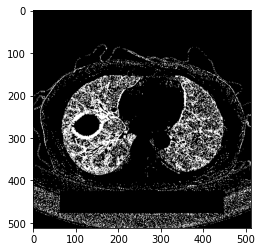

In [56]:
img1=cv.imread("test/reticular/1400001.jpg")
img2=cv.imread("test/reticular/1500001.jpg")
img1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.cvtColor(img2,cv.COLOR_BGR2GRAY)



level=8 #灰度级
#变换灰度级
grayLevel1=np.zeros(img1.shape,np.uint8)
grayLevel2=np.zeros(img1.shape,np.uint8)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        l=img1[i,j]/(256/level)  #0,1,..,level-1级
        grayLevel1[i,j]=l
        l=img2[i,j]/(256/level)  #0,1,..,level-1级
        grayLevel2[i,j]=l





mask=np.zeros(img1.shape,np.uint8)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if grayLevel1[i,j]==grayLevel2[i,j]:
            mask[i,j]=0
        else:
            mask[i,j]=255
    
    
plt.imshow(mask,cmap="gray")

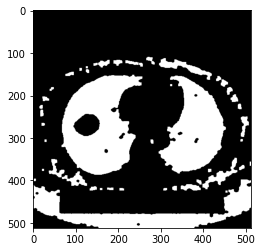

In [57]:
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))
closing=cv.morphologyEx(mask,cv.MORPH_CLOSE,kernel)#使用闭操作消除图像内部的小孔

for i in range(7):
    closing=cv.morphologyEx(closing,cv.MORPH_CLOSE,kernel)#使用闭操作消除图像内部的小孔

kernel=np.ones((5,5))
closing=cv.morphologyEx(closing,cv.MORPH_OPEN,kernel)
plt.imshow(closing,cmap="gray")

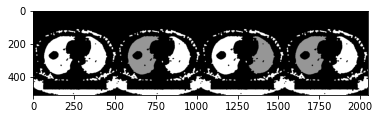

In [58]:
seedPoint1=(180,190)
seedPoint2=(400,300)
seedPoint3=(150,350)
mask=np.zeros([closing.shape[0]+2,closing.shape[1]+2],np.uint8)
fill1=closing.copy()
cv.floodFill(fill1,mask=mask,seedPoint=seedPoint1,newVal=150)
mask2=np.zeros([closing.shape[0]+2,closing.shape[1]+2],np.uint8)
fill2=closing.copy()
cv.floodFill(fill2,mask=mask2,seedPoint=seedPoint2,newVal=150)
mask3=np.zeros([closing.shape[0]+2,closing.shape[1]+2],np.uint8)
fill3=closing.copy()
cv.floodFill(fill3,mask=mask3,seedPoint=seedPoint3,newVal=150)
plt.imshow(np.hstack((closing,fill1,fill2,fill3)),cmap="gray")


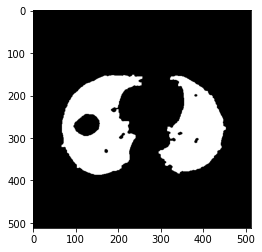

In [59]:
mask_all=mask[1:mask.shape[0]-1,1:mask.shape[0]-1]+mask2[1:mask2.shape[0]-1,1:mask2.shape[0]-1]+mask3[1:mask3.shape[0]-1,1:mask3.shape[0]-1]
image=np.zeros(img1.shape,np.uint8)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if mask_all[i,j]>=1:
            image[i,j]=255
        else:
            image[i,j]=0
    
plt.imshow(image,cmap="gray")

kernel=np.ones((5,5))
image=cv.morphologyEx(image,cv.MORPH_OPEN,kernel)
plt.imshow(image,cmap="gray")

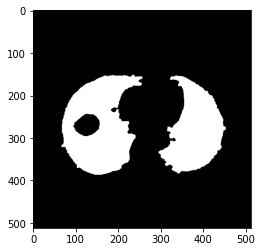

In [60]:
#孔洞填充   区域生长法
mask=np.zeros([image.shape[0]+2,image.shape[1]+2],np.uint8)
fill1=image.copy()
cv.floodFill(fill1,mask=mask,seedPoint=seedPoint1,newVal=150)
mask2=np.zeros([image.shape[0]+2,image.shape[1]+2],np.uint8)
fill2=image.copy()
cv.floodFill(fill2,mask=mask2,seedPoint=seedPoint2,newVal=150)
mask3=np.zeros([image.shape[0]+2,image.shape[1]+2],np.uint8)
background=image.copy()
cv.floodFill(background,mask=mask3,seedPoint=(1,1),newVal=150)#除掉面积很大的那个孔洞
mask4=np.zeros([image.shape[0]+2,image.shape[1]+2],np.uint8)
white=image.copy()
cv.floodFill(white,mask=mask4,seedPoint=(120,280),newVal=150)
plt.imshow(np.hstack((fill1,fill2,background,white)),cmap="gray")

mask_all=mask[1:mask.shape[0]-1,1:mask.shape[0]-1]+mask2[1:mask2.shape[0]-1,1:mask2.shape[0]-1]+mask3[1:mask3.shape[0]-1,1:mask3.shape[0]-1]+mask4[1:mask4.shape[0]-1,1:mask4.shape[0]-1]
holes=np.zeros(image.shape)




for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if mask_all[i,j]==0:
            image[i,j]=255

#image=cv.bitwise_or(image,holes)
plt.imshow(image,cmap="gray")

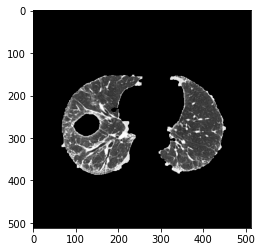

In [61]:
mask=image.copy()
finalResult=np.zeros(img2.shape,np.uint8)
for i in range(img2.shape[0]):
    for j in range(img1.shape[1]):
        if mask[i,j]==255:
            finalResult[i,j]=img2[i,j]
        else:
            finalResult[i,j]=0
            
plt.imshow(cv.cvtColor(finalResult,cv.COLOR_BGR2RGB))

## 另一种方法

123.76377487182617
143.8523279050584
146.05706832435044
146.39931397951162
146.39931397951162


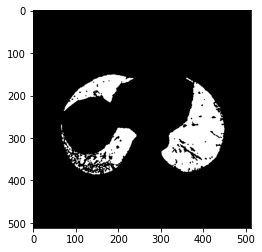

In [62]:
img=cv.imread("test/reticular/0100001.jpg")#转换成灰度图
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#全局阈值分割
meanGray=img.mean() #平均灰度值
ret,thresh=cv.threshold(img,meanGray,255,cv.THRESH_BINARY)
T=meanGray

result=[]
T_last=0
print(abs(T_last-T))
while abs(T_last-T)>0.1:
    T_last=T
    zero_value=0
    zero_num=0
    one_value=0
    one_num=0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if thresh[i,j]==0:
                zero_num+=1
                zero_value+=img[i,j]
            else:
                one_num+=1
                one_value+=img[i,j]

    T=((zero_value/zero_num)+(one_value/one_num))/2 #计算前景和背景的平均灰度

    meanGray=T
    print(meanGray)
    ret,thresh=cv.threshold(img,meanGray,255,cv.THRESH_BINARY)
    result.append(thresh)

contours, hierarchy = cv.findContours(thresh,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
maxArea=0
maxContour=[]
index=0
for i in range(len(contours)):
    area = cv.contourArea(contours[i])
    if area>maxArea:
        maxArea=area
        maxContour=contours[i]

i=cv.drawContours(img, [maxContour], 0, (0,150,100), 3)


#判断点是否在最大连通区域轮廓内,制作掩模
mask=thresh.copy()
isIn=0
for i in range(thresh.shape[0]):
    for j in range(thresh.shape[1]):
        isIn=cv.pointPolygonTest(maxContour,(j,i),False)
        
        if isIn==1:
            mask[i,j]=0
        else:
            mask[i,j]=255
    
    
#取反
mask=~mask
result=mask-thresh
#闭运算
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
result=cv.morphologyEx(result,cv.MORPH_CLOSE,kernel)#使用闭操作消除图像内部的小孔
plt.imshow(result,cmap="gray")

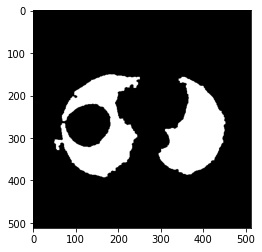

In [322]:
plt.imshow(image,cmap="gray")

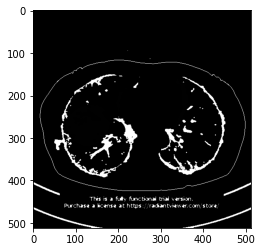

In [323]:
plt.imshow(image-result,cmap="gray")

In [324]:
for i in range(holes.shape[0]):
    for j in range(holes.shape[1]):
        if mask_all[i,j]>=1:
            holes[i,j]=0
        else:
            holes[i,j]=255

contours, hierarchy = cv.findContours(holes,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
maxArea=0
maxContour=[]
index=0
for i in range(len(contours)):
    area = cv.contourArea(contours[i])
    if area>maxArea:
        maxArea=area
        maxContour=contours[i]
if maxArea>20:
    isIn=0
    for i in range(holes.shape[0]):
        for j in range(holes.shape[1]):
            isIn=cv.pointPolygonTest(maxContour,(j,i),False)
            if isIn==1:
                mask_all[i,j]=0
        

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-39p1qqfs/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'
